# Analise descritiva

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Carregar os dados
anp = pd.read_parquet('../../dados/anp_precos_transformado.parquet')
dolar = pd.read_parquet('../../dados/dolar.parquet')


In [2]:
# Exibir as primeiras linhas para entender os dados
def explorar_df(df, nome):
    print(f'\n--- {nome} ---')
    print(df.head())
    print(df.columns)
    print(df.dtypes)

explorar_df(anp, 'ANP')
explorar_df(dolar, 'Dólar')


--- ANP ---
  data_inicial data_final            estado       municipio           produto  \
0   2025-06-08 2025-06-14           SERGIPE         ARACAJU  ETANOL HIDRATADO   
1   2025-06-08 2025-06-14              PARA           BELEM  ETANOL HIDRATADO   
2   2025-06-08 2025-06-14      MINAS GERAIS  BELO HORIZONTE  ETANOL HIDRATADO   
3   2025-06-08 2025-06-14           RORAIMA       BOA VISTA  ETANOL HIDRATADO   
4   2025-06-08 2025-06-14  DISTRITO FEDERAL        BRASILIA  ETANOL HIDRATADO   

   numero_de_postos_pesquisados unidade_de_medida  preco_medio_revenda  \
0                            11              R$/l                 4.95   
1                             8              R$/l                 4.79   
2                            36              R$/l                 4.21   
3                             8              R$/l                 5.15   
4                            25              R$/l                 4.84   

   desvio_padrao_revenda  preco_minimo_revenda  preco_m

In [3]:
# Para cada data_inicial, data_final em anp fazer uma média do valor do dolar nesse periodo, e depois fazer um left join pelo par data_inicial, data_final

### Valores unicos do par data_inicial, data_final
unicos_dt_anp = anp[['data_inicial', 'data_final']].drop_duplicates()

# Para cada data_inicial, data_final em unicos_dt_anp, fazer um left join pelo par data_inicial, data_final com dolar e calcular a média do valor do dolar nesse periodo
lista_anp_dolar = []
for index, row in unicos_dt_anp.iterrows():
    data_inicial = row['data_inicial']
    data_final = row['data_final']
    dolar_periodo = dolar[(dolar['data'] >= data_inicial) & (dolar['data'] <= data_final)]
    media_dolar = dolar_periodo['valor'].mean()
    lista_anp_dolar.append({'data_inicial': data_inicial, 'data_final': data_final, 'media_dolar': media_dolar})

df_anp_dolar = pd.DataFrame(lista_anp_dolar)

# Fazer um left join pelo par data_inicial, data_final com anp e dolar
df_anp_dolar = df_anp_dolar.merge(anp, on=['data_inicial', 'data_final'], how='left')


In [4]:
# Exibir as primeiras linhas para entender os dados
explorar_df(df_anp_dolar, 'ANP com Dólar')



--- ANP com Dólar ---
  data_inicial data_final  media_dolar            estado       municipio  \
0   2025-06-08 2025-06-14      5.55494           SERGIPE         ARACAJU   
1   2025-06-08 2025-06-14      5.55494              PARA           BELEM   
2   2025-06-08 2025-06-14      5.55494      MINAS GERAIS  BELO HORIZONTE   
3   2025-06-08 2025-06-14      5.55494           RORAIMA       BOA VISTA   
4   2025-06-08 2025-06-14      5.55494  DISTRITO FEDERAL        BRASILIA   

            produto  numero_de_postos_pesquisados unidade_de_medida  \
0  ETANOL HIDRATADO                            11              R$/l   
1  ETANOL HIDRATADO                             8              R$/l   
2  ETANOL HIDRATADO                            36              R$/l   
3  ETANOL HIDRATADO                             8              R$/l   
4  ETANOL HIDRATADO                            25              R$/l   

   preco_medio_revenda  desvio_padrao_revenda  preco_minimo_revenda  \
0                 4.95

## Análise da variável alvo (Preço médio do combustivel)

In [9]:
# Análise descritiva da variável dependente

for tipo in df_anp_dolar['produto'].unique():
    df_tipo = df_anp_dolar[df_anp_dolar['produto'] == tipo]
    print(f"Estatísticas Descritivas para 'preco_medio_revenda' do tipo {tipo}:")
    print(df_tipo['preco_medio_revenda'].describe())


Estatísticas Descritivas para 'preco_medio_revenda' do tipo ETANOL HIDRATADO:
count    7134.000000
mean        4.362105
std         0.505841
min         2.790000
25%         3.992500
50%         4.400000
75%         4.730000
max         5.960000
Name: preco_medio_revenda, dtype: float64
Estatísticas Descritivas para 'preco_medio_revenda' do tipo GASOLINA ADITIVADA:
count    7246.000000
mean        6.006889
std         0.557470
min         4.670000
25%         5.630000
50%         6.010000
75%         6.380000
max         7.690000
Name: preco_medio_revenda, dtype: float64
Estatísticas Descritivas para 'preco_medio_revenda' do tipo GASOLINA COMUM:
count    7256.000000
mean        5.823798
std         0.578975
min         4.480000
25%         5.437500
50%         5.840000
75%         6.180000
max         7.650000
Name: preco_medio_revenda, dtype: float64
Estatísticas Descritivas para 'preco_medio_revenda' do tipo GLP:
count    7214.000000
mean      108.020313
std        10.710088
min     

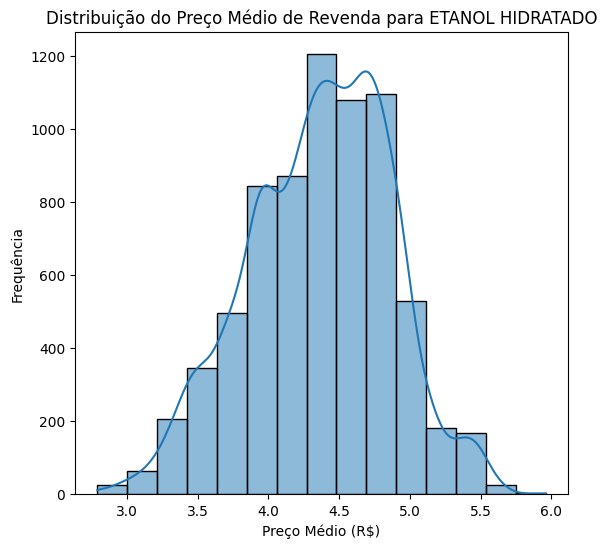

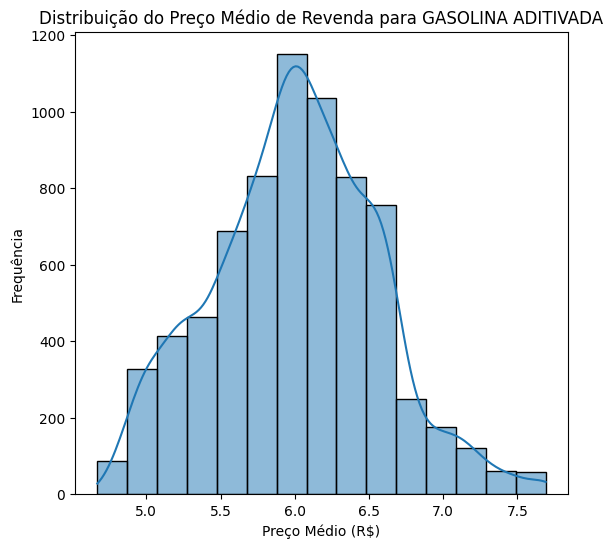

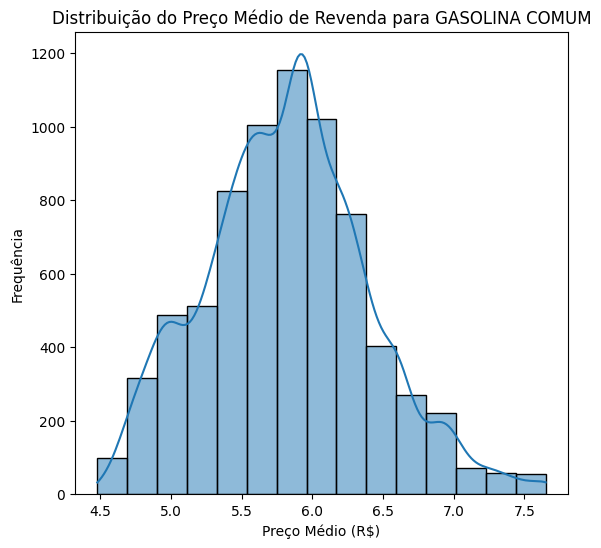

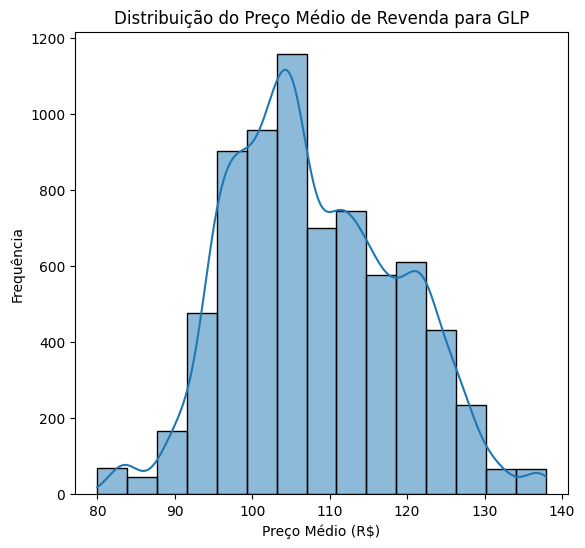

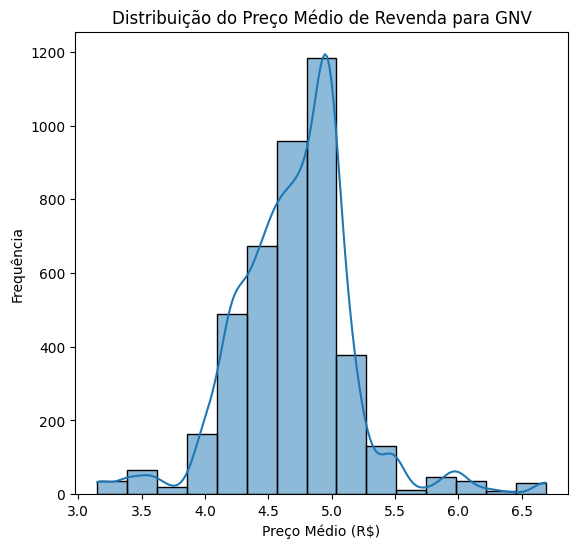

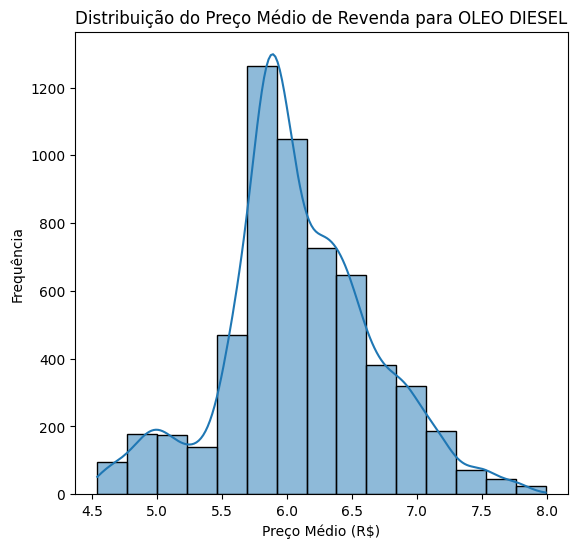

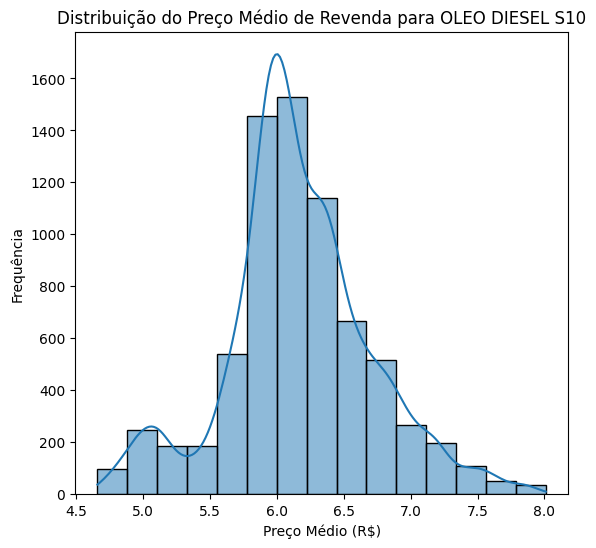

In [10]:
# Visualização da distribuição

for tipo in df_anp_dolar['produto'].unique():
    df_tipo = df_anp_dolar[df_anp_dolar['produto'] == tipo]
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_tipo['preco_medio_revenda'], kde=True, bins=15)
    plt.title(f'Distribuição do Preço Médio de Revenda para {tipo}')
    plt.xlabel('Preço Médio (R$)')
    plt.ylabel('Frequência')
    plt.savefig(f'../../graficos/distribuicao_preco_medio_{tipo}.png')
    plt.show()
    plt.close()


Excelente! Estes gráficos individuais oferecem uma visão muito mais clara e útil da estrutura de preços de cada combustível. A análise deles confirma e detalha nossas suspeitas anteriores.

A seguir, apresento uma análise descritiva de cada histograma, focando na forma, centro e dispersão, e o que isso significa para a sua modelagem.

***

### Análise Detalhada das Distribuições de Preços

| Produto | Forma da Distribuição | Centro (Preço Mais Comum) | Dispersão (Faixa de Preço) |
| :--- | :--- | :--- | :--- |
| **Gasolina Comum** | **Aproximadamente Normal e Simétrica.** A curva se assemelha a um sino, o que é ideal para modelos lineares. | Concentração em torno de **R$ 5,80**. | A maioria dos preços varia entre R$ 4,80 e R$ 7,00. |
| **Gasolina Aditivada**| **Aproximadamente Normal e Simétrica.** Muito similar à gasolina comum, mas deslocada para a direita. | Concentração em torno de **R$ 6,00**. | Um pouco mais ampla, com preços variando de R$ 5,00 a R$ 7,50. |
| **Etanol Hidratado** | **Aproximadamente Normal e Simétrica.** Também possui uma boa forma de sino. | Concentração em torno de **R$ 4,50**. | Preços variam principalmente entre R$ 3,50 e R$ 5,50. |
| **Óleo Diesel** | **Aproximadamente Normal e Simétrica.** | Concentração em torno de **R$ 5,90**. | Preços variam principalmente entre R$ 5,00 e R$ 7,50. |
| **Óleo Diesel S10** | **Aproximadamente Normal e Simétrica.** Similar ao Diesel comum, mas com preços ligeiramente mais altos. | Concentração em torno de **R$ 6,00**. | Faixa de preço similar ao Diesel comum, mas com mais frequência em valores altos. |
| **GNV** | **Assimétrica à Direita e Leptocúrtica (Afunilada).** A distribuição não é perfeitamente simétrica; há um "pico" agudo e uma cauda que se estende para a direita (preços mais altos). | Pico agudo em torno de **R$ 4,75**. | Embora o pico seja estreito, a faixa de preços é relativamente ampla, de R$ 3,50 a R$ 6,50. |
| **GLP** | **Leve Assimetria à Esquerda.** A curva é um pouco "puxada" para a esquerda, com uma cauda em direção aos preços mais baixos. Pode até sugerir mais de um agrupamento de preços. | Concentração principal em torno de **R$ 105,00**. | Dispersão muito alta, com preços variando de R$ 80,00 a mais de R$ 130,00. |

***

### Principais Conclusões e Implicações para a Modelagem

1.  **Normalidade é uma Boa Notícia:** Para **Gasolinas, Etanol e Óleos Diesel**, a distribuição dos preços se aproxima muito de uma distribuição normal. Isso é uma excelente notícia para o seu modelo misto, pois fortalece o pressuposto de normalidade dos resíduos que os modelos lineares exigem. Você provavelmente **não precisará de transformações** (como logaritmo) na variável `preco_medio_revenda` para este grupo de combustíveis.

2.  **GNV e GLP são Diferentes:**
    * A assimetria do **GNV** sugere que, embora a maioria dos preços esteja concentrada, existem alguns municípios ou períodos com preços atipicamente altos.
    * A distribuição do **GLP** é a mais complexa. A leve assimetria e a largura da distribuição podem indicar que existem subgrupos de preços distintos dentro do GLP (talvez por região, distribuidora ou política de preços local).

3.  **Validação Final para o Modelo:** Esta análise valida de forma definitiva a decisão de incluir a variável `produto` como um **efeito fixo** fundamental no seu modelo. Ele não só irá capturar as óbvias diferenças de média (R$ 5,80 para gasolina vs. R$ 105,00 para GLP), mas também ajudará o modelo a se ajustar melhor às diferentes formas de variância e distribuição de cada combustível.

Em resumo, a sua exploração dos dados está no caminho certo. A separação por produto revelou as características individuais de cada mercado, fornecendo informações valiosas que irão resultar em um modelo estatístico muito mais preciso e confiável.

## Análise estática

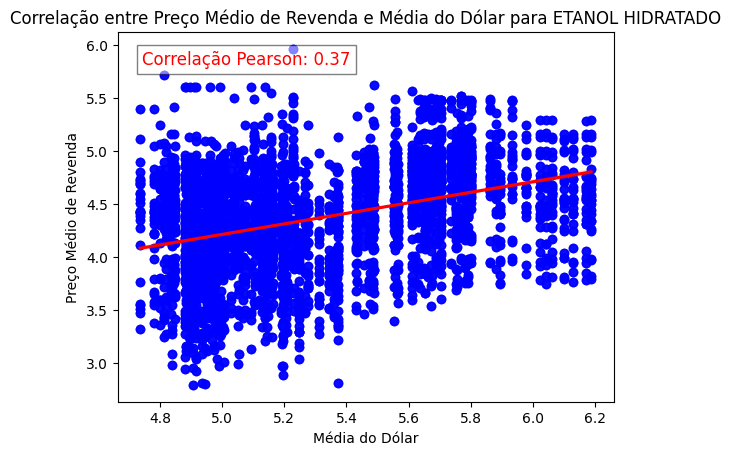

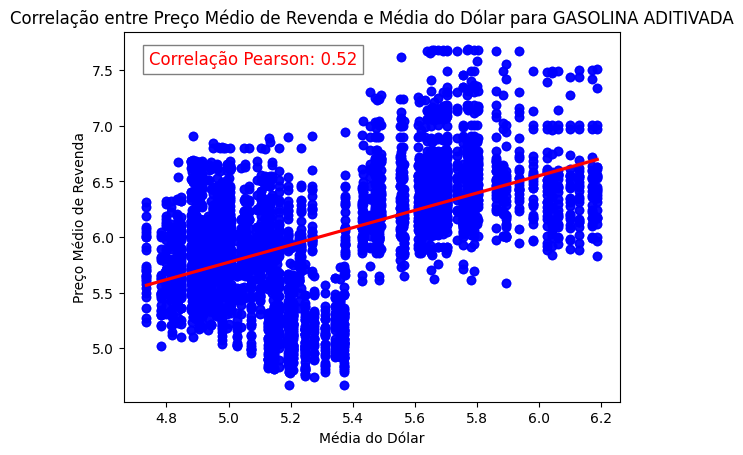

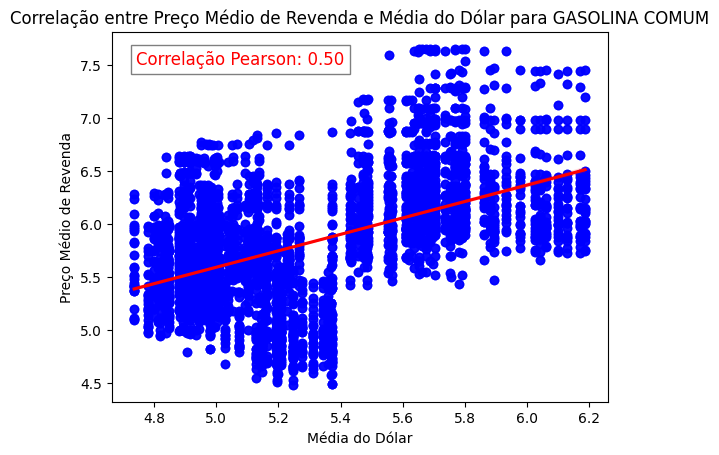

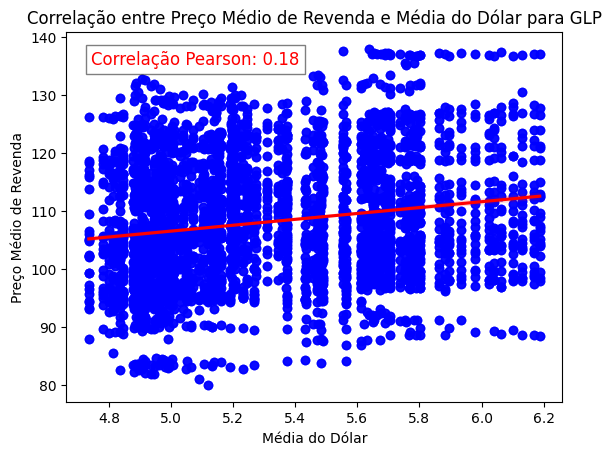

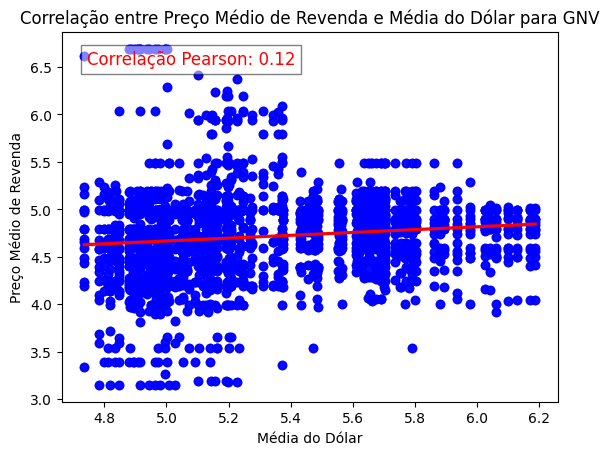

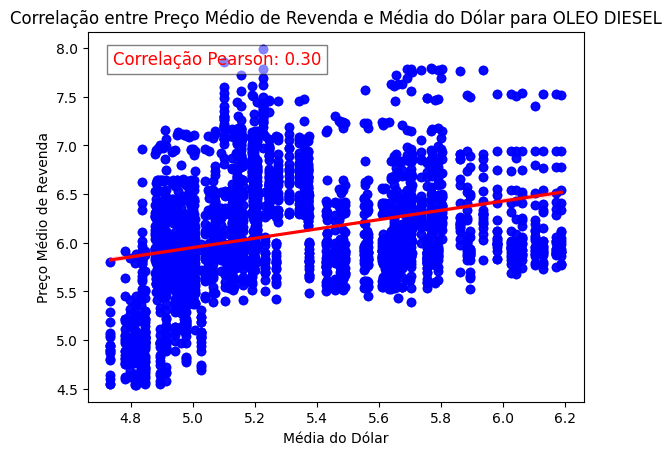

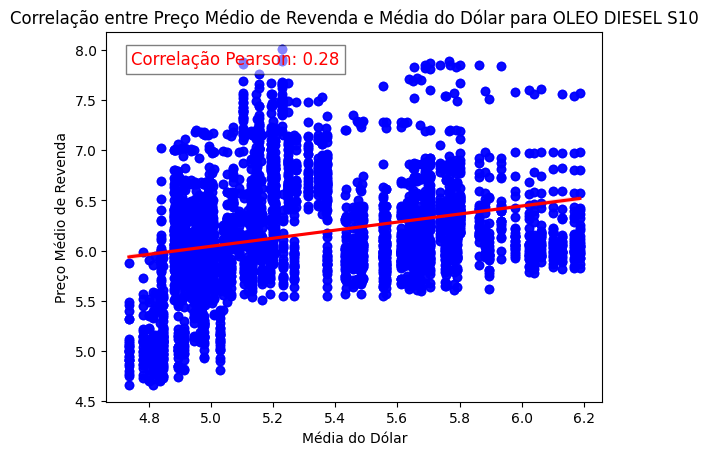

In [5]:
# Criar um diretório para os gráficos
if not os.path.exists('../../graficos'):
    os.makedirs('../../graficos')

# Analisendo correlação preco_medio_revenda com media_dolar por tipo de combustivel
# Gráfico de dispesao com regressão linear com intervalo de confiança de 95% com cor vermelho

for tipo in df_anp_dolar['produto'].unique():
    df_tipo = df_anp_dolar[df_anp_dolar['produto'] == tipo]
    correlacao = df_tipo['media_dolar'].corr(df_tipo['preco_medio_revenda'], method='pearson')
    sns.regplot(x='media_dolar', y='preco_medio_revenda', data=df_tipo, color='blue', line_kws={'color': 'red'}, ci=95)
    plt.xlabel('Média do Dólar')
    plt.ylabel('Preço Médio de Revenda')
    plt.title(f'Correlação entre Preço Médio de Revenda e Média do Dólar para {tipo}')
    plt.text(0.05, 0.95, f'Correlação Pearson: {correlacao:.2f}', transform=plt.gca().transAxes, verticalalignment='top', fontsize=12, 
             color='red', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
    plt.savefig(f'../../graficos/correlação_{tipo}.png')
    plt.show()


Com base nos gráficos, a **Gasolina Aditivada** e a **Gasolina Comum** apresentam a correlação mais forte com a cotação do dólar, enquanto o **GNV** e o **GLP** demonstram a correlação mais fraca.

Isso indica que os preços das gasolinas são mais sensíveis às variações da moeda americana em comparação com os outros combustíveis analisados.

***

## Análise das Correlações

O **Coeficiente de Correlação de Pearson ($r$)** mede a força da relação linear entre duas variáveis. Ele varia de -1 (correlação negativa perfeita) a +1 (correlação positiva perfeita). Um valor próximo de zero indica uma relação fraca ou inexistente.

Nos gráficos apresentados, todos os combustíveis mostram uma correlação positiva com o dólar, o que significa que, de modo geral, quando a cotação do dólar sobe, o preço médio de revenda desses combustíveis também tende a aumentar. A intensidade dessa relação, no entanto, varia:

* **Gasolinas (Comum e Aditivada):** Apresentam uma **correlação positiva moderada** ($r=0.50$ para a comum e $r=0.52$ para a aditivada). Esta é a relação mais forte entre os combustíveis analisados, confirmando a forte influência da cotação do dólar e do preço do barril de petróleo no mercado internacional sobre os preços da gasolina no Brasil.

* **Etanol Hidratado:** Mostra uma **correlação positiva fraca** ($r=0.37$). Embora o etanol seja um produto nacional, seu preço é indiretamente influenciado pelo da gasolina (seu principal concorrente) e por custos de produção que podem ter componentes dolarizados.

* **Óleo Diesel (Comum e S10):** Exibem uma **correlação positiva fraca** ($r=0.30$ para o comum e $r=0.28$ para o S10). Assim como a gasolina, o diesel tem seu preço atrelado ao mercado internacional, mas a correlação observada no período foi menos intensa.

* **GLP e GNV:** Registram as menores correlações, sendo ambas **positivas e muito fracas** ($r=0.18$ para o GLP e $r=0.12$ para o GNV). Isso sugere que outros fatores, como políticas de preço específicas, oferta e demanda internas, têm uma influência muito maior sobre os preços do gás de cozinha e do gás veicular do que a variação do dólar.

***

## Resumo

A ordem dos combustíveis, da maior para a menor correlação com o dólar, é:

1.  **Gasolina Aditivada** ($r=0.52$)
2.  **Gasolina Comum** ($r=0.50$)
3.  **Etanol Hidratado** ($r=0.37$)
4.  **Óleo Diesel** ($r=0.30$)
5.  **Óleo Diesel S10** ($r=0.28$)
6.  **GLP** ($r=0.18$)
7.  **GNV** ($r=0.12$)

## Análise temporal

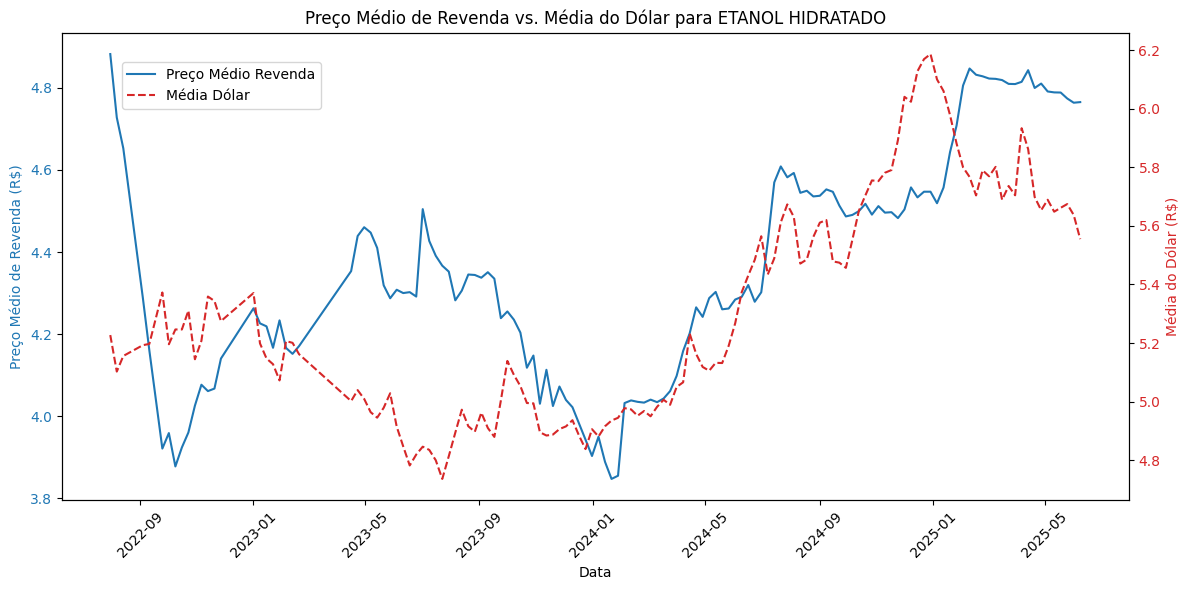

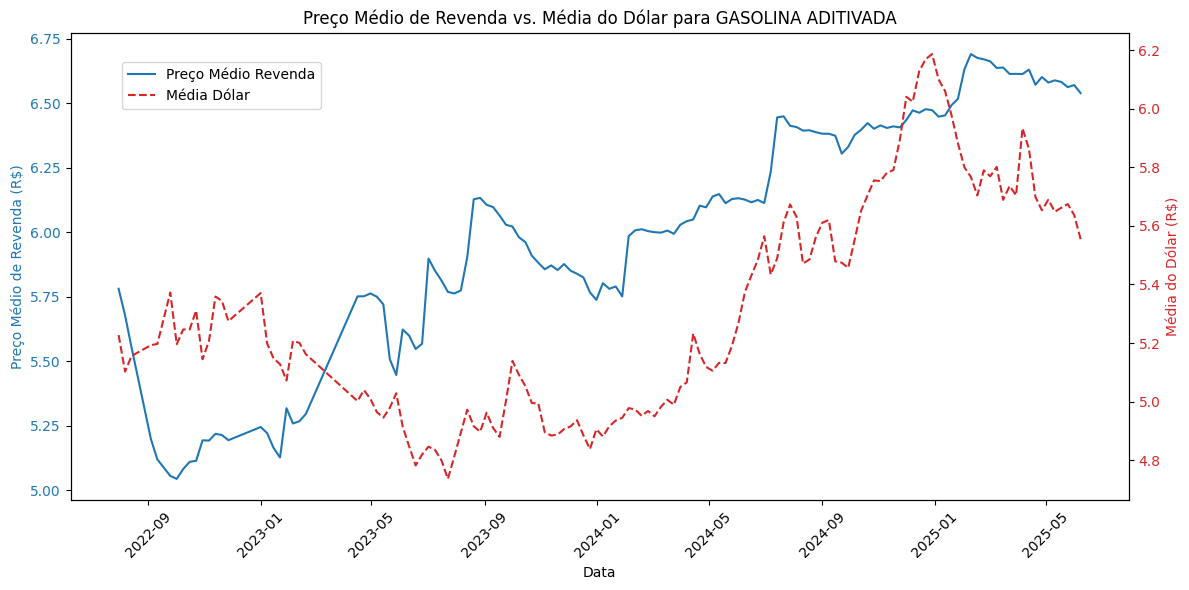

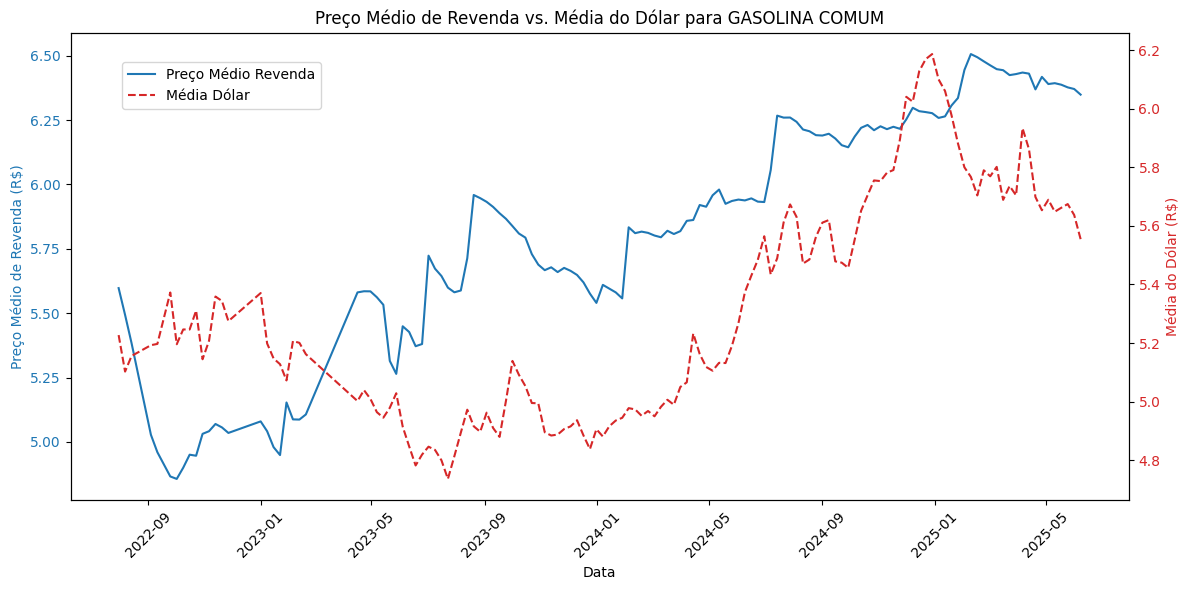

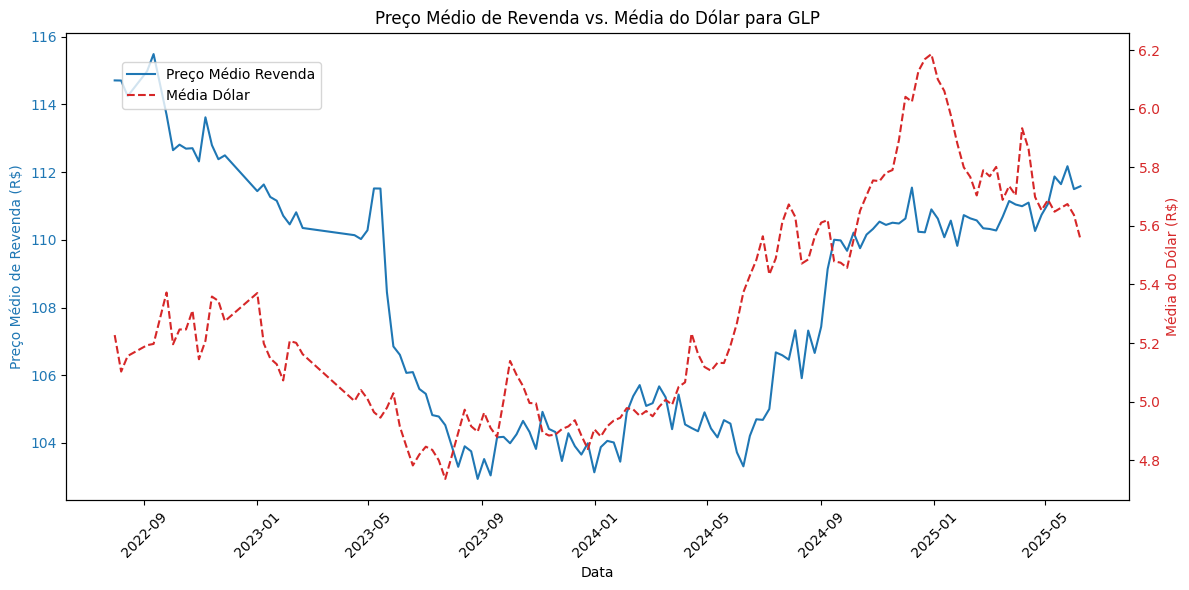

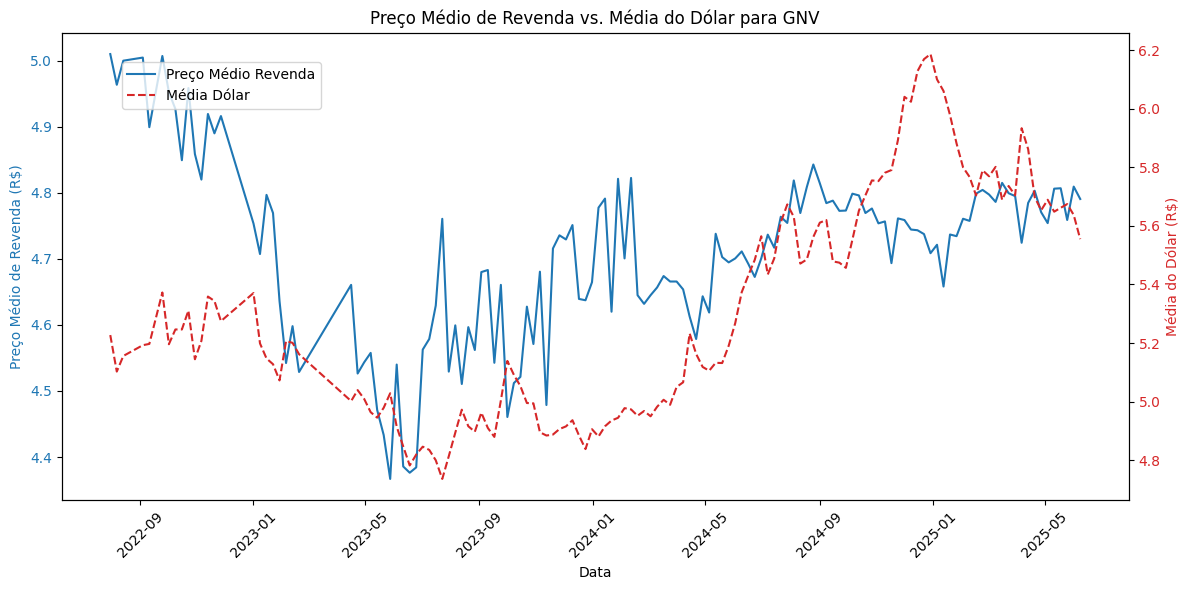

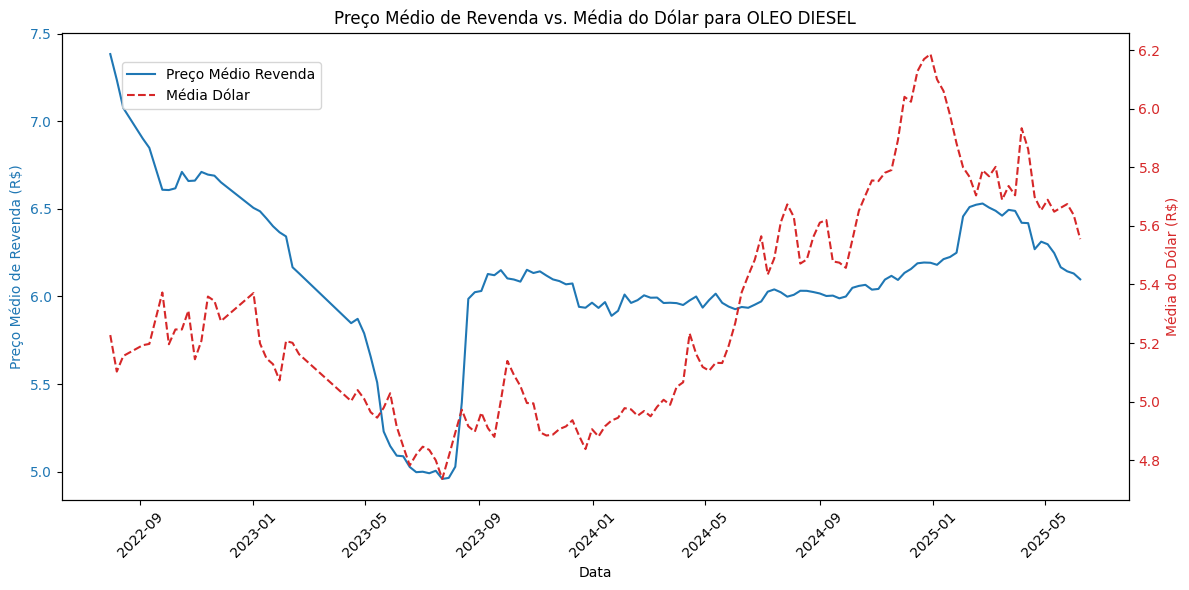

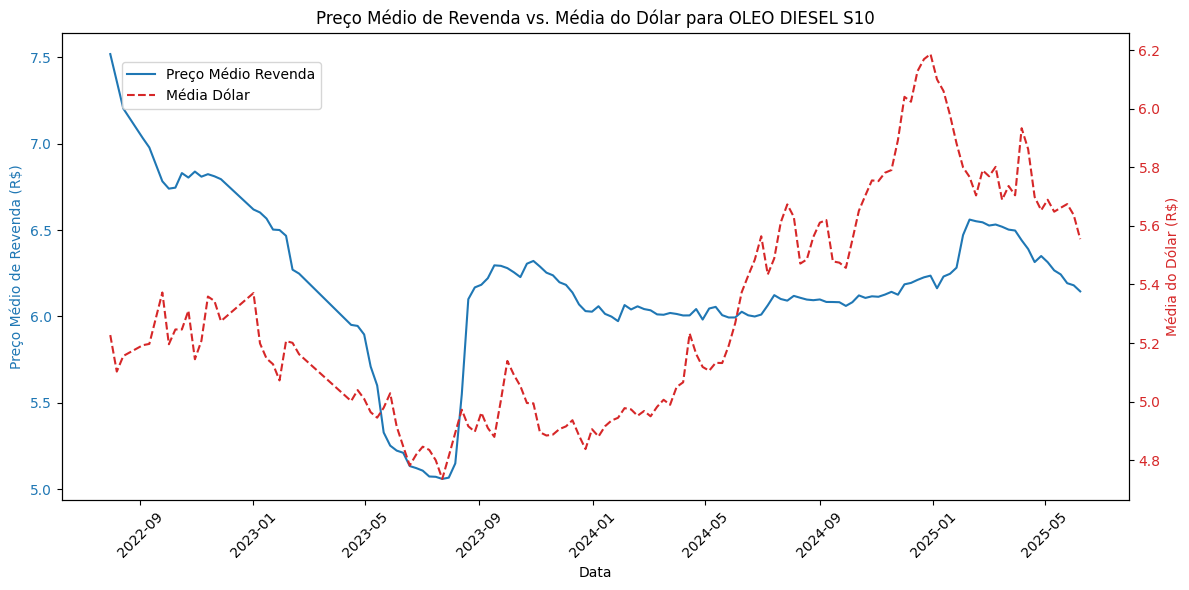

In [6]:
# Analisando relação temporal (eixo X = Data, eixo Y = Preço/Cotação) para cada tipo de combustivel
# Utilizando a média do preco_medio_revenda por data_inicial

for tipo in df_anp_dolar['produto'].unique():
    df_tipo = df_anp_dolar[df_anp_dolar['produto'] == tipo]

    # Agrupando os dados por data para garantir um ponto por data
    df_tipo_anp = df_tipo.groupby('data_inicial')['preco_medio_revenda'].mean().reset_index()
    df_tipo_dolar = df_tipo.groupby('data_inicial')['media_dolar'].mean().reset_index()
    df_tipo_anp_dolar = pd.merge(df_tipo_anp, df_tipo_dolar, on='data_inicial', how='inner')

    # --- Início das Modificações para o Eixo Duplo ---

    # 1. Criar a figura e o primeiro eixo (ax1)
    # Isso nos dá mais controle sobre os elementos do gráfico.
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 2. Plotar o Preço Médio no primeiro eixo (ax1)
    cor_preco = 'tab:blue'
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Preço Médio de Revenda (R$)', color=cor_preco)
    ax1.plot(df_tipo_anp_dolar['data_inicial'], df_tipo_anp_dolar['preco_medio_revenda'], color=cor_preco, label='Preço Médio Revenda')
    ax1.tick_params(axis='y', labelcolor=cor_preco)
    ax1.tick_params(axis='x', rotation=45)


    # 3. Criar o segundo eixo (ax2) que compartilha o eixo x (twinx)
    ax2 = ax1.twinx()

    # 4. Plotar a Média do Dólar no segundo eixo (ax2)
    cor_dolar = 'tab:red'
    ax2.set_ylabel('Média do Dólar (R$)', color=cor_dolar)
    ax2.plot(df_tipo_anp_dolar['data_inicial'], df_tipo_anp_dolar['media_dolar'], color=cor_dolar, linestyle='--', label='Média Dólar')
    ax2.tick_params(axis='y', labelcolor=cor_dolar)

    # --- Fim das Modificações ---

    # Título e legenda unificada
    plt.title(f'Preço Médio de Revenda vs. Média do Dólar para {tipo}')
    fig.tight_layout() # Ajusta o layout para evitar que os rótulos se sobreponham
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) # Adiciona uma legenda única

    # Salvar a figura em um arquivo
    # Modifiquei o nome do arquivo para refletir o novo tipo de gráfico
    plt.savefig(f'../../graficos/relacao_temporal_eixo_duplo_{tipo.replace(" ", "_")}.png')

Com base na análise temporal dos gráficos, observa-se que a relação entre o preço dos combustíveis e a cotação do dólar não é constante, variando em intensidade ao longo do período analisado (setembro de 2022 a meados de 2025).

De forma geral, a partir do início de 2024, a maioria dos combustíveis demonstra um alinhamento mais claro com a tendência de alta do dólar. No entanto, em outros momentos, fatores específicos de cada mercado (como políticas de preço, sazonalidade e impostos) causaram descolamentos significativos.

***

### Análise Temporal Detalhada

* **Gasolinas (Comum e Aditivada):**
    * **2022-2023:** A relação é mista. Enquanto o dólar apresentava uma tendência de queda, o preço da gasolina oscilou, chegando a subir de forma acentuada em meados de 2023, mesmo com o dólar em baixa. Isso indica uma forte influência de outros fatores, como a mudança na política de preços da Petrobras e alterações no ICMS.
    * **A partir de 2024:** A partir do início de 2024, a sincronia aumenta visivelmente. Ambas as curvas iniciam uma clara trajetória de alta, com os picos e vales do preço da gasolina acompanhando de perto as flutuações do dólar. Este período ilustra bem a correlação moderada apontada na análise anterior.

* **Óleo Diesel (Comum e S10):**
    * **2022-2023:** Neste período, o diesel apresentou a relação visual mais forte e direta com o dólar. Ambas as curvas mostram uma queda acentuada e síncrona até meados de 2023.
    * **Meados de 2023 - Início de 2024:** O preço do diesel se estabiliza em um patamar mais alto e com menos volatilidade, enquanto o dólar permanece em níveis baixos, mostrando um certo descolamento.
    * **A partir de 2024:** A tendência de alta do dólar é acompanhada por uma subida mais suave e gradual no preço do diesel, retomando a relação direta.

* **Etanol Hidratado:**
    * A trajetória do etanol acompanha a tendência geral do dólar (queda em 2022-23 e alta a partir de 2024), mas com uma volatilidade muito maior. A influência do preço da gasolina (seu principal concorrente) e os períodos de safra e entressafra da cana-de-açúcar explicam essas oscilações mais bruscas.

* **GLP (Gás de Cozinha):**
    * O GLP é o combustível que demonstra a menor aderência visual às flutuações do dólar. Seu preço se move em "degraus", com longos períodos de estabilidade, sugerindo uma política de reajustes menos frequente e mais influenciada por decisões governamentais do que pela variação cambial diária. A tendência de queda até 2023 e a alta a partir de 2024 acompanham o dólar, mas de forma defasada e muito suavizada.

* **GNV (Gás Natural Veicular):**
    * O preço do GNV é o mais volátil de todos. Embora a tendência de longo prazo (queda e posterior alta) se assemelhe à do dólar, as flutuações de curto prazo parecem caóticas e descorrelacionadas. Isso confirma a correlação estatística muito fraca e sugere que seu preço é dominado por contratos de fornecimento, regulação estadual e outras variáveis locais.

***

### Conclusão

Os gráficos temporais enriquecem a análise de correlação ao mostrar que:

1.  **A Dependência Varia com o Tempo:** A influência do dólar sobre os preços não é uma constante, tornando-se mais forte ou mais fraca dependendo do cenário econômico e das políticas setoriais vigentes.
2.  **Derivados de Petróleo (Gasolina e Diesel):** Possuem a ligação mais evidente com o dólar no longo prazo, embora políticas de preço internas possam causar descolamentos temporários.
3.  **Biocombustível (Etanol):** Segue as tendências do dólar, mas sua volatilidade é amplificada pela sazonalidade da produção e pela concorrência direta com a gasolina.
4.  **Gases (GLP e GNV):** Apresentam a menor sensibilidade à variação cambial, com preços que parecem ser mais administrados e influenciados por fatores regulatórios e contratuais.